In [1]:
from clique_benchmark import Trials
from graph_database import Graphs, Graph
import matplotlib.pyplot as plt
import numpy as np
graph_db = Graphs()
trial_db = Trials()

In [2]:
# run this cell to load the job results for all trials that are waiting pending job results
await trial_db.load_results()

In [3]:
for grover_iterations in range(1, 6):
    print(f"Grover iterations: {grover_iterations}")
    for trial in trial_db.get(grover_iterations=grover_iterations):
        print(f"Trial {trial.trial_id} with graph: {trial.graph}")
        print(sorted(trial.counts.items(), key=lambda t: t[1], reverse=True))
        print(sorted(trial.simulation_counts.items(), key=lambda t: t[1], reverse=True))
        print(trial.success_rate)
        print(trial.simulation_success_rate)
        print(trial.expected_success_rate)
        print("")

Grover iterations: 1
Trial 1 with graph: 001
[('010', 148), ('111', 144), ('110', 143), ('000', 136), ('011', 121), ('001', 107), ('100', 105), ('101', 96)]
[('110', 474), ('111', 96), ('010', 82), ('001', 77), ('101', 71), ('100', 71), ('000', 67), ('011', 62)]
0.143
0.474
0.7812500000000001

Trial 3 with graph: 100
[('101', 159), ('111', 139), ('011', 135), ('010', 133), ('001', 120), ('110', 116), ('100', 106), ('000', 92)]
[('011', 485), ('000', 80), ('100', 78), ('110', 77), ('010', 75), ('001', 74), ('111', 66), ('101', 65)]
0.135
0.485
0.7812500000000001

Trial 5 with graph: 011
[('011', 277), ('010', 147), ('100', 139), ('000', 112), ('001', 107), ('110', 87), ('101', 68), ('111', 63)]
[('110', 511), ('101', 489)]
0.155
1.0
1.0

Trial 6 with graph: 010
[('010', 150), ('111', 138), ('000', 137), ('110', 135), ('101', 119), ('011', 111), ('001', 106), ('100', 104)]
[('101', 469), ('100', 82), ('000', 81), ('111', 79), ('110', 77), ('011', 74), ('001', 71), ('010', 67)]
0.119
0.46

In [4]:
def get_probability_data(trial_db):
    n_data = []
    grover_iterations_data = []
    probability_data = []

    for n in range(2, 21):
        for grover_iterations in range(1, 6):
            print(f"(n, grover_iterations) = ({n}, {grover_iterations})")
            trials = trial_db.get(n=n, grover_iterations=grover_iterations)

            if len(trials) == 0:
                print(f"Warning: no results for {n} variables, complexity {grover_iterations}; skipping")
                continue

            success_rates = np.zeros(len(trials))
            expected_success_rates = np.zeros(len(trials))

            for i, trial in enumerate(trials):
                success_rates[i] = trial.success_rate
                expected_success_rates[i] = trial.expected_success_rate
            
            n_data.append(n)
            grover_iterations_data.append(grover_iterations)
            probability_data.append(np.mean(success_rates / expected_success_rates))
            print(f"Mean success rate over expected: {probability_data[-1]}")
    
    return n_data, grover_iterations_data, probability_data

def plot_probability_data(n_data, grover_iterations_data, probability_data, title, filepath=None):
    plt.figure(figsize=(20, 10))
    plt.scatter(n_data, grover_iterations_data, c=probability_data, cmap='RdYlGn', edgecolors='black', alpha=0.75, s=450)
    plt.xticks(np.arange(min(n_data), max(n_data) + 1, 1))
    plt.yticks(np.arange(min(grover_iterations_data), max(grover_iterations_data) + 1, 1))

    plt.xlabel('Verticies Count')
    plt.ylabel('Grover Iterations')
    plt.title(title)
    cbar = plt.colorbar()
    if filepath is not None:
        plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()

In [5]:
n_data, grover_iterations_data, probability_data = get_probability_data(trial_db)

(n, grover_iterations) = (2, 1)
(n, grover_iterations) = (2, 2)
(n, grover_iterations) = (2, 3)
(n, grover_iterations) = (2, 4)
(n, grover_iterations) = (2, 5)
(n, grover_iterations) = (3, 1)
Mean success rate over expected: 0.3145266666666667
(n, grover_iterations) = (3, 2)
Mean success rate over expected: 0.13505234159779614
(n, grover_iterations) = (3, 3)
(n, grover_iterations) = (3, 4)
(n, grover_iterations) = (3, 5)
(n, grover_iterations) = (4, 1)
Mean success rate over expected: 0.2589380081752842
(n, grover_iterations) = (4, 2)
Mean success rate over expected: 0.11800978290885696
(n, grover_iterations) = (4, 3)
Mean success rate over expected: 0.06328111194002212
(n, grover_iterations) = (4, 4)
(n, grover_iterations) = (4, 5)
(n, grover_iterations) = (5, 1)
Mean success rate over expected: 0.2298588708175571
(n, grover_iterations) = (5, 2)
Mean success rate over expected: 0.09513603367675454
(n, grover_iterations) = (5, 3)
Mean success rate over expected: 0.05788676830916716
(n,

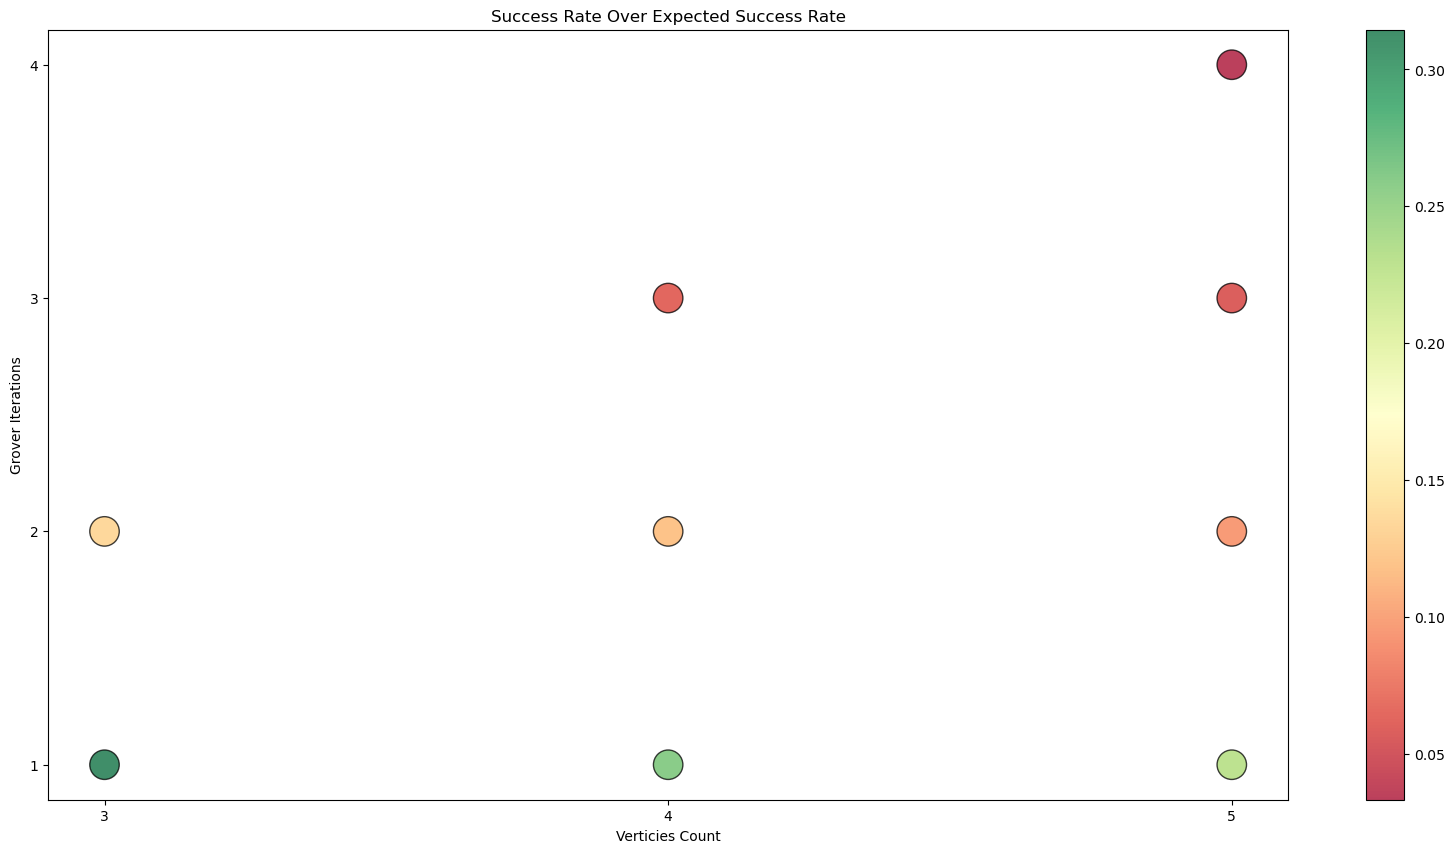

In [6]:
plot_probability_data(n_data, grover_iterations_data, probability_data, "Success Rate Over Expected Success Rate", filepath="mean_success_rate_over_expected.png")